In [ ]:
!git clone https://github.com/aditya-sudo/errant.git
%cd errant
!git clone https://github.com/nusnlp/m2scorer
!pip install -e .
!unzip -n ../hi_hdtb_models.zip
!mkdir -p ~/stanfordnlp_resources
!cp -r hi_hdtb_models ~/stanfordnlp_resources/hi_hdtb_models
!mkdir -p ../data/out

Cloning into 'errant'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 264 (delta 1), reused 0 (delta 0), pack-reused 256 (from 1)
Receiving objects: 100% (264/264), 2.11 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (119/119), done.
/content/errant
Cloning into 'm2scorer'...
remote: Enumerating objects: 57, done.
remote: Total 57 (delta 0), reused 0 (delta 0), pack-reused 57 (from 1)
Receiving objects: 100% (57/57), 34.86 KiB | 2.49 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Obtaining file:///content/errant
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: Insecure, upgrade to 0.12.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
WIKI_EXTRACTED_DIR = "../data"
orig_file_path = f"{WIKI_EXTRACTED_DIR}/hiwiki.extracted.clean.src"
cor_file_path = f"{WIKI_EXTRACTED_DIR}/hiwiki.extracted.clean.trg"

!ls $orig_file_path
!ls $cor_file_path

!python3 errant/commands/parallel_to_m2.py -orig $orig_file_path -cor $cor_file_path > tmp.log


../data/hiwiki.extracted.clean.src
../data/hiwiki.extracted.clean.trg
/usr/local/lib/python3.10/dist-packages/stanfordnlp/models/tokenize/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

In [ ]:
WIKI_EXTRACTED_DIR="../data"
!python3  errant/commands/parallel_to_m2.py  -orig $WIKI_EXTRACTED_DIR/hiwiki.extracted.clean.src -cor $WIKI_EXTRACTED_DIR/hiwiki.extracted.clean.trg>tmp.log

/usr/local/lib/python3.10/dist-packages/stanfordnlp/models/tokenize/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, lambda sto

In [ ]:
tmp=!cat error_file
if tmp and "R:" in tmp[0]: # Check if tmp is not empty and contains "R:"
    c={a:int(b) for a,b in map(str.split,tmp[0].split("R:")[1:])}
else:
    c = {} # Initialize c as an empty dictionary if conditions are not met
    print("Warning: error_file is empty or does not contain expected format.")

from collections import Counter
c=Counter(c)
print(sum(c.values()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
sns.set_palette('inferno_r')
c['OTHER']+=c["NUM"]
del c['NUM']
c=dict(c.most_common())

0


<ipython-input-9-2eb849458ac3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(c.keys()), y=list(c.values()), palette="autumn")


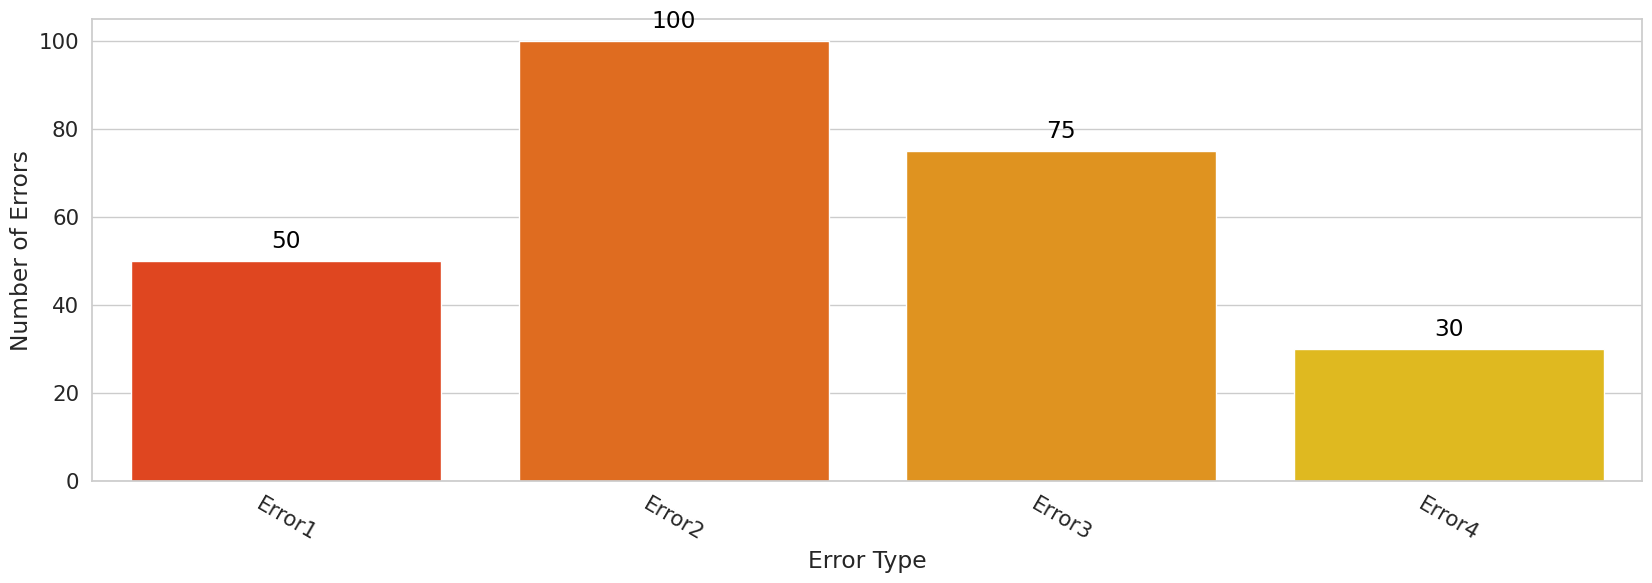

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
c = {'Error1': 50, 'Error2': 100, 'Error3': 75, 'Error4': 30}

# Plotting
fig = plt.figure(figsize=(20, 6))

# Correcting the barplot function
ax = sns.barplot(x=list(c.keys()), y=list(c.values()), palette="autumn")

# Rotate x-axis labels
plt.xticks(rotation=-30)

# Set labels
ax.set_ylabel('Number of Errors')
ax.set_xlabel('Error Type')

# Annotate bars with values
for i, v in enumerate(c.values()):
    ax.text(i, v + 3, str(v), ha='center', color='black')

plt.show()


In [ ]:
import os


for model in ('fairseq','mlconvgec','basetransformer'):
  out_files=[]
  trg_files=[]
  src_files=[]
  m2_files=[]

  err_types =  os.listdir("../data/out")

  for err_type in err_types :
      err_fold=os.path.join("../data/out",err_type)
      out_file=os.path.join(err_fold, model+".out")
      m2_file =os.path.join(err_fold,err_type+'.m2')
      src_file =os.path.join(err_fold,err_type+'.src')
      trg_file =os.path.join(err_fold,err_type+'.trg')

      trg_files.append(trg_file)
      src_files.append(src_file)
      out_files.append(out_file)
      m2_files.append(m2_file)
      !python2 m2scorer/scripts/m2scorer.py  $out_file $m2_file >{err_fold}/{model}.m2score
      !python errant/gleu.py -r $trg_file -s $src_file --hyp  $out_file>{err_fold}/{model}.gleu

  out_files=" ".join(out_files)
  trg_files=" ".join(trg_files)
  src_files=" ".join(src_files)
  m2_files=" ".join(m2_files)

  !mkdir -p ../data/{model}
  !cat $out_files> ../data/{model}/{model}.out
  !cat $trg_files> ../data/{model}/{model}.trg
  !cat $src_files> ../data/{model}/{model}.src
  !cat $m2_files> ../data/{model}/{model}.m2
  !python2 m2scorer/scripts/m2scorer.py  ../data/{model}/{model}.out ../data/{model}/{model}.m2 >../data/{model}/{model}.m2score
  !python errant/gleu.py -r data/{model}/{model}.trg -s data/{model}/{model}.src --hyp  data/{model}/{model}.out>data/{model}/{model}.gleu

^C
^C
^C
^C
/bin/bash: line 1: python2: command not found
/bin/bash: line 1: data/fairseq/fairseq.gleu: No such file or directory
^C
^C
^C


In [ ]:
import os
model='fairseq'
err_types =  os.listdir("out")
for err_type in err_types :
  print(err_type)
  !head out/{err_type}/{model}.gleu out/{err_type}/{model}.m2score
!head data/{model}/{model}.gleu data/{model}/{model}.m2score

In [ ]:
!head -40 out/R_VERB_INFL/*

==> out/R_VERB_INFL/basetransformer.gleu <==
out/R_VERB_INFL/R_VERB_INFL_basetransformer.out
There is one reference. NOTE: GLEU is not computing the confidence interval.
0.794382

==> out/R_VERB_INFL/basetransformer.m2score <==
Precision   : 0.5720
Recall      : 0.4690
F_0.5       : 0.5480

==> out/R_VERB_INFL/basetransformer.out <==
चाय के दुकान से लेकर वाहनों और दिवारों तक हर जगह विज्ञापन ही विज्ञापन दिखाई देते हैं .
आज हम विज्ञापन युग के सीमान्त पर आ खड़े हुए हैं .
वो धूम 3 में दिखीं जिसने भारतीय फ़िल्मों में सबसे ज़्यादा कमाई के हैं .
कुछ लोग इस ह्रास को विकासशील राष्ट्रों में सामाजिक अशांति एवं संघर्ष के प्रमुख कारण के रूप में देखते हैं .
2 व्यापक रूप मे काबीनेक संश्लेषण मे नियोजित किया गया है .
मुख्य रूप से सोडियम एमाइड एक मजबूत बेस मे कार्बनिक रसायन , तरल अमोनिया समाधान मे अक्सर के रूप मे प्रयोग किया जाता है .
इंडिगो , सोडियम के औद्योगिक उत्तपादन मे एमाइड लाते हैं के अत्यधिक मूल मिश्रण का एक घटक है .
इसके अतिरिक्त यहाँ हाल ही में बने मॉल जैसे सिटीवाक और एम जी एफ मेट्रोपोलिटन भी 